# scrape tabel/data uit wikipedia

In [42]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
#website inladen
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'
page = requests.get(url)#info voor response
soup = BeautifulSoup(page.text,'html')#parser, informatie uit page als text weergeven
print(soup)

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-typography-survey-disabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies in the United States by revenue - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned

In [44]:
soup.find_all('table')[1]#juiste tabel vinden
tabel= soup.find_all('table')[1]
print(tabel)

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">611,289
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [45]:
kopjes = tabel.find_all('th')#alleen de kopjes selecteren van tabel
kopjes

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [46]:
kopjes_title= [title.get_text(strip=True) for title in kopjes]#overzetten naar text
kopjes_title

['Rank',
 'Name',
 'Industry',
 'Revenue(USD millions)',
 'Revenue growth',
 'Employees',
 'Headquarters']

In [47]:
df = pd.DataFrame(columns=kopjes_title)
df

,Rank,Name,Industry,Revenue(USD millions),Revenue growth,Employees,Headquarters


In [48]:
rows = tabel.find_all('tr')
for row in rows[1:]:#loopen door data per row
    data = row.find_all('td')
    dataperrow=[data.text.strip()for data in data]
    
    leng = len(df)
    df.loc[leng] = dataperrow
    

In [49]:
df

,Rank,Name,Industry,Revenue(USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,"46,298",10.6%,"71,100","Richfield, Minnesota"
96,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5%,"34,300","New York City, New York"
97,98,United Airlines,Airline,"44,955",82.5%,"92,795","Chicago, Illinois"
98,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5%,"130,000","Waltham, Massachusetts"


In [50]:
df.to_csv('companies.csv', index=False) #overzetten naar csv bestand

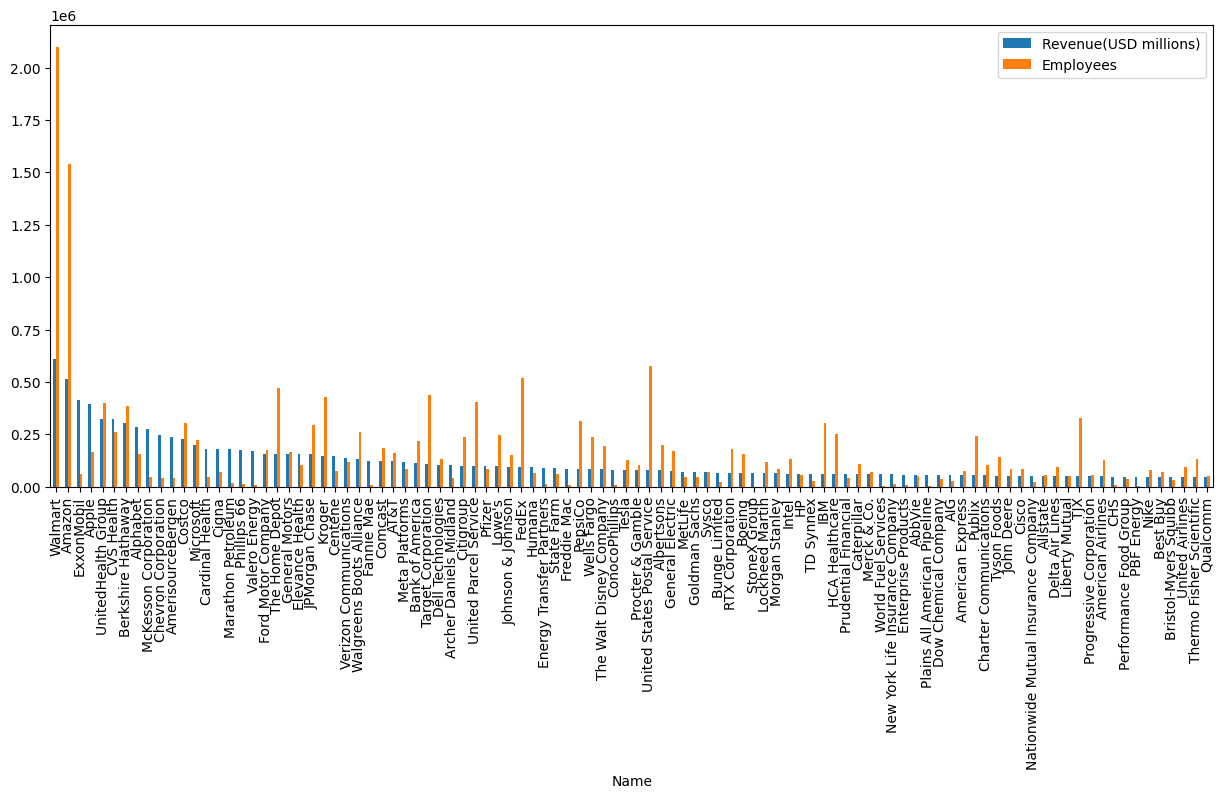

In [51]:
df["Revenue(USD millions)"] = pd.to_numeric(df["Revenue(USD millions)"].str.replace(',', ''), errors='coerce')
df["Employees"] = pd.to_numeric(df["Employees"].str.replace(',', ''), errors='coerce')
df.plot(x="Name", y=["Revenue(USD millions)", "Employees"], kind="bar", figsize=(15, 6))

plt.show()

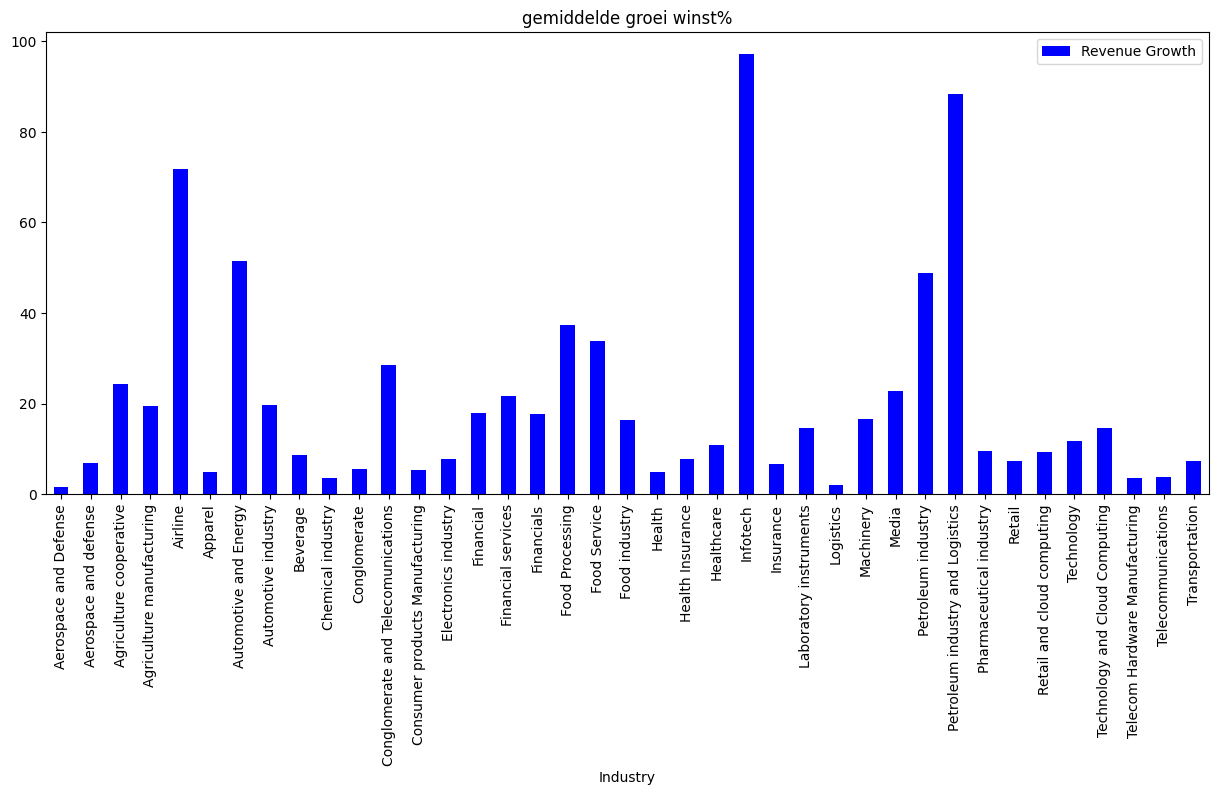

In [52]:
df['Revenue Growth'] = df['Revenue growth'].str.rstrip('%').astype(float)
grouped_df = df.groupby('Industry')['Revenue Growth'].mean().reset_index()

lines = grouped_df.plot(x='Industry', y='Revenue Growth', kind='bar', color='b', figsize=(15, 6))
plt.xticks(rotation='vertical')
plt.title('gemiddelde groei winst%')
plt.show()


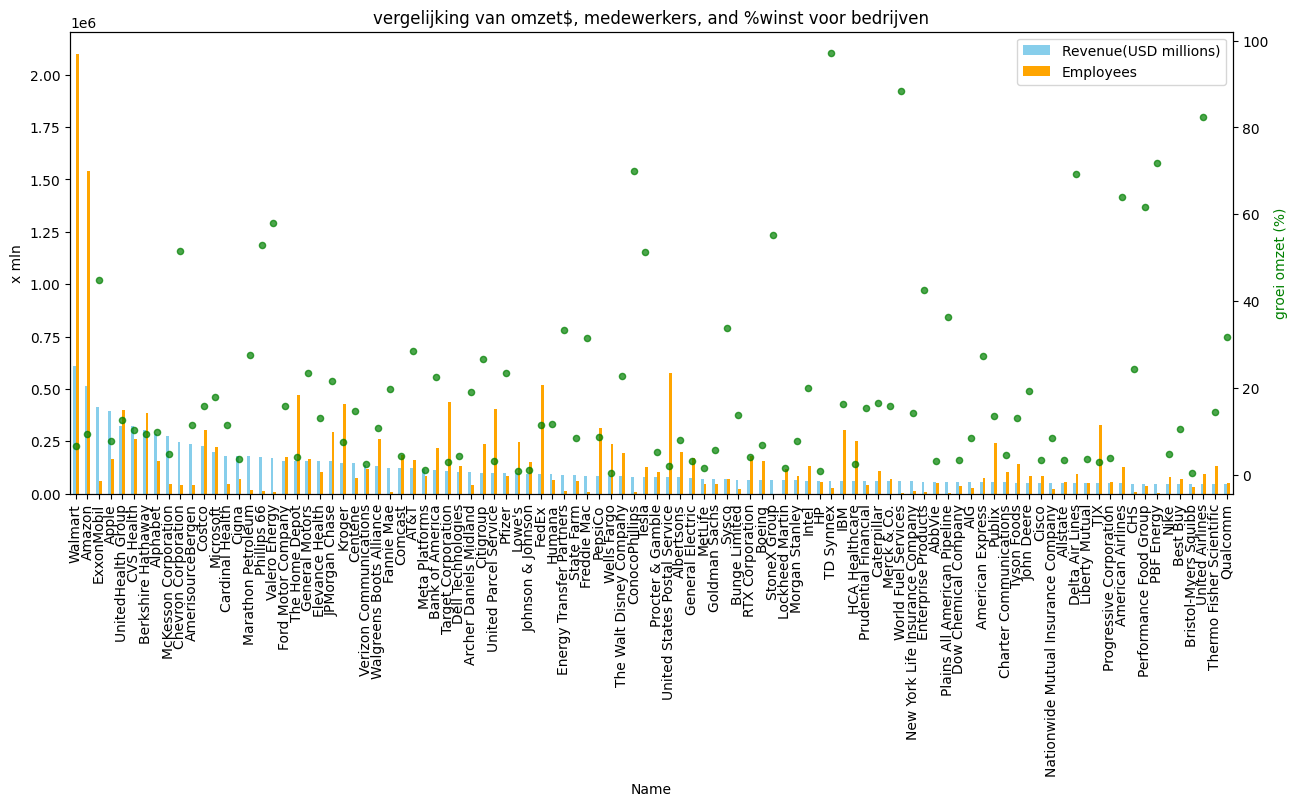

In [53]:
fig, ax1 = plt.subplots(figsize=(15, 6))
df[['Name', 'Revenue(USD millions)', 'Employees']].plot(x='Name', kind='bar', ax=ax1, color=['skyblue', 'orange'])
ax1.set_xlabel('Name')
ax1.set_ylabel('x mln')
ax2 = ax1.twinx()
df.plot(x='Name', y='Revenue Growth', kind='scatter', ax=ax2, color='green',  alpha=0.7)
ax2.set_ylabel('groei omzet (%)', color='green')

plt.title('vergelijking van omzet$, medewerkers, and %winst voor bedrijven')
plt.show()